In [548]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [549]:
data = pd.read_csv("kc_house_data.csv")


In [550]:
data.head()
#we see the head of the data to know how the data looks
#like and use describe function to see the percentile’s 
#and other key statistics.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,?,?,...,7,1180,0,1955,norennovation,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,?,?,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,?,?,...,6,770,0,1933,norennovation,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,?,?,...,7,1050,910,1965,norennovation,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,?,?,...,8,1680,0,1987,norennovation,98074,47.6168,-122.045,1800,7503


In [551]:
 data=data.rename(columns={'date':'Date','price':'Price','bathrooms':'Bathroom','bedrooms':'Bedrooms','sqft_living':'Living_Area','sqft_lot':'Floor Space','sqft_basement':'Basement','yr_built':'year of Built','yr_renovated':'year of renovation','lat':'latittude','long':'longitude','sqft_living15':'Square Feet living','sqft_lot15':'Square Feet flooring'})

In [552]:
data=data.replace('?',0)

In [553]:
data.head()

,id,Date,Price,Bedrooms,Bathroom,Living_Area,Floor Space,floors,waterfront,view,...,grade,sqft_above,Basement,year of Built,year of renovation,zipcode,latittude,longitude,Square Feet living,Square Feet flooring
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,norennovation,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,norennovation,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,norennovation,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,norennovation,98074,47.6168,-122.045,1800,7503


In [554]:
data=data.replace('norennovation',0)
data.head()

,id,Date,Price,Bedrooms,Bathroom,Living_Area,Floor Space,floors,waterfront,view,...,grade,sqft_above,Basement,year of Built,year of renovation,zipcode,latittude,longitude,Square Feet living,Square Feet flooring
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [555]:
data.describe()
# the dataset has a house where the house has 33 bedrooms,
#seems to be a massive house 
#and would be interesting to know more about it as we progress.

#Maximum living Area is 13,450sqft where as the minimum is 290sqft.
#we can see that the data is distributed.

,id,Price,Bedrooms,Bathroom,Living_Area,Floor Space,floors,condition,grade,sqft_above,Basement,year of Built,zipcode,latittude,longitude,Square Feet living,Square Feet flooring
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,3.409430,7.656873,1788.390691,291.509045,1971.005136,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.650743,1.175459,828.090978,442.575043,29.373411,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

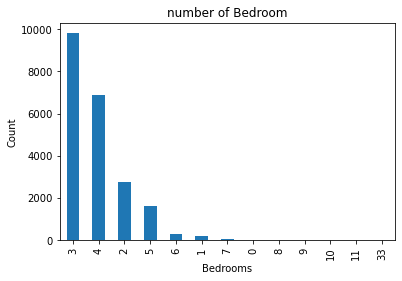

In [556]:
data['Bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine
#the graph tells  builder opts to make houses
#which are more than 3 bedrooms which attracts
#the higher middle class and upper class section of the society.

<Figure size 720x720 with 0 Axes>

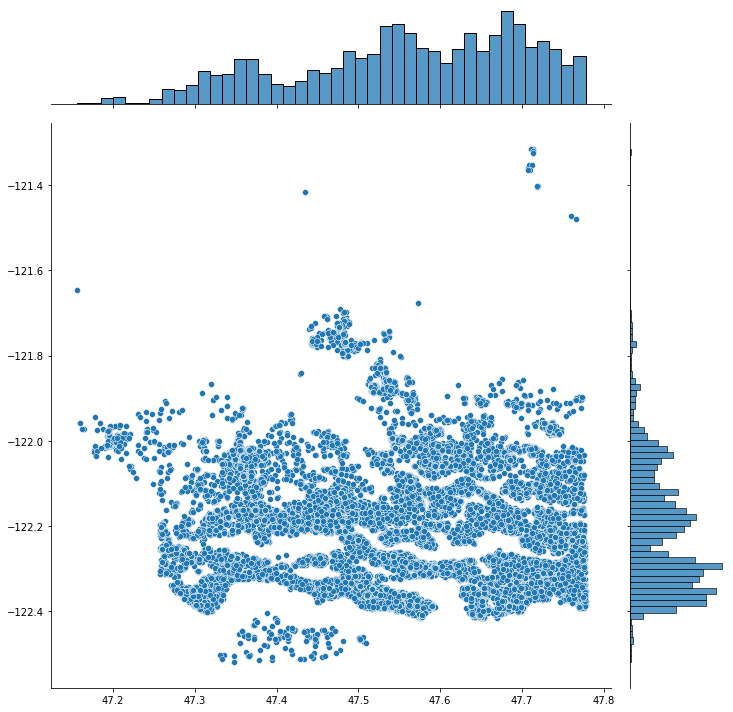

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [557]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.latittude.values, y=data.longitude.values, height=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

sns.despine
# we have latitude and longitude on the dataset for each house.
# We are going to see the common location and how the houses are placed.
# we used seaborn for this visualtization

Text(0.5, 0, 'Living Area *1000000')

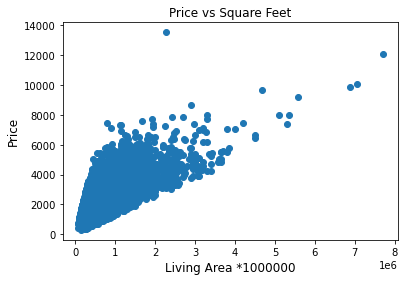

In [558]:
plt.scatter(data.Price,data.Living_Area)
plt.title("Price vs Square Feet")
plt.ylabel('Price', fontsize=12)
plt.xlabel('Living Area *1000000', fontsize=12)

Text(0.5, 0, 'living Area *1000000')

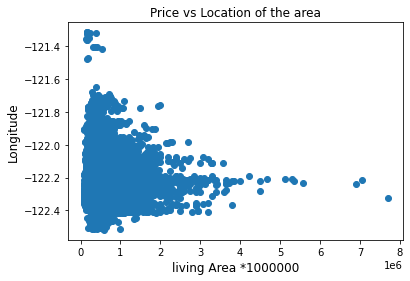

In [559]:
plt.scatter(data.Price,data.longitude)
plt.title("Price vs Location of the area")
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('living Area *1000000', fontsize=12)

Text(0.5, 1.0, 'Latitude vs Price')

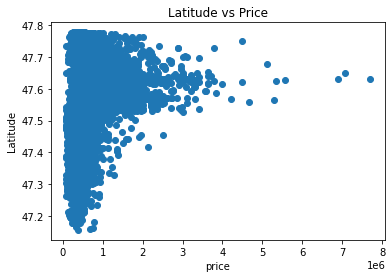

In [560]:
plt.scatter(data.Price,data.latittude)
plt.xlabel("price")
plt.ylabel('Latitude')
plt.title("Latitude vs Price")

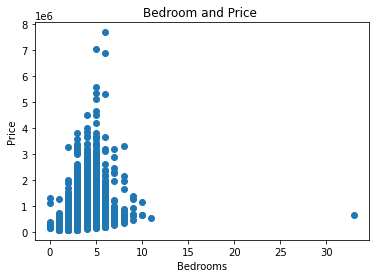

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [561]:
plt.scatter(data.Bedrooms,data.Price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

Text(0.5, 1.0, 'What living area and basement square feet tells about Price')

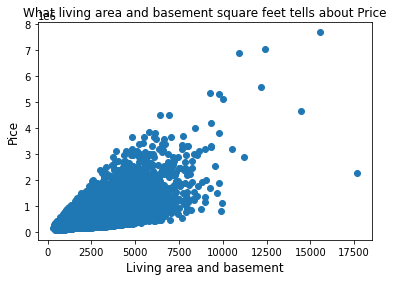

In [562]:
plt.scatter((data['Living_Area']+data['Basement']),data['Price'])
plt.ylabel('Pice', fontsize=12)
plt.xlabel('Living area and basement', fontsize=12)
plt.title('What living area and basement square feet tells about Price')

Text(0.5, 0, 'WaterFront')

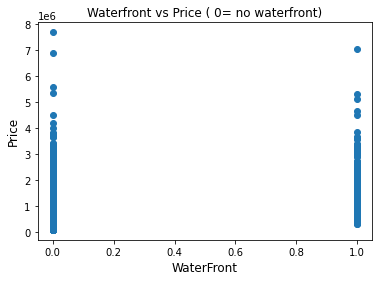

In [563]:
plt.scatter(data.waterfront,data.Price)
plt.title("Waterfront vs Price ( 0= no waterfront)")
plt.ylabel('Price', fontsize=12)
plt.xlabel('WaterFront', fontsize=12)

Text(0.5, 1.0, ' How Price is effected by the number of Floors')

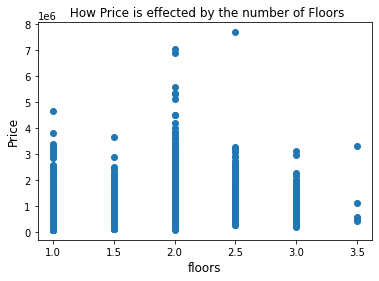

In [564]:
plt.scatter(data.floors,data.Price)
plt.ylabel('Price', fontsize=12)
plt.xlabel('floors', fontsize=12)
plt.title(' How Price is effected by the number of Floors')

Text(0.5, 1.0, 'Condition and Price')

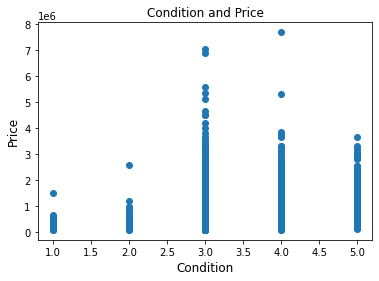

In [565]:
plt.scatter(data.condition,data.Price)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Condition', fontsize=12)
plt.title('Condition and Price')

Text(0.5, 1.0, 'Price of the location by Zipcode')

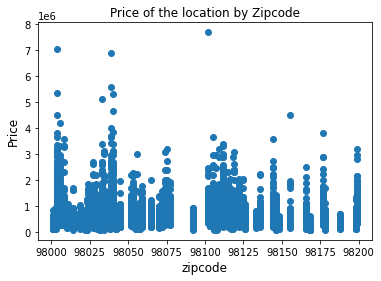

In [566]:
plt.scatter(data.zipcode,data.Price)
plt.ylabel('Price', fontsize=12)
plt.xlabel('zipcode', fontsize=12)
plt.title('Price of the location by Zipcode')

In [567]:
#As we can see from all the above representation that
#many factors are affecting the prices of the house ,
#like square feet which increases the price of the 
#house and even location influencing the prices of the house.

In [568]:
# Now we carry out linear Regression
train1 = data.drop(['id', 'Price'],axis=1)

In [569]:
train1.head()

,Date,Bedrooms,Bathroom,Living_Area,Floor Space,floors,waterfront,view,condition,grade,sqft_above,Basement,year of Built,year of renovation,zipcode,latittude,longitude,Square Feet living,Square Feet flooring
0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Text(0.5, 0, 'count')

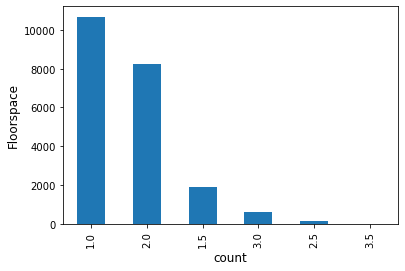

In [570]:
data.floors.value_counts().plot(kind='bar')
plt.ylabel('Floorspace', fontsize=12)
plt.xlabel('count', fontsize=12)

In [571]:
reg = LinearRegression()

In [572]:
labels = data['Price']
conv_dates = [1 if values == 2014 else 0 for values in data.Date ]
data['Date'] = conv_dates
train1 = data.drop(['id', 'Price'],axis=1)

In [573]:
#We use train data and test data , train
#data to train our machine and test data to 
#see if it has learnt the data well or not
#we use sklearn library
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.25,random_state =2)
reg.fit(x_train,y_train)

LinearRegression()

In [574]:
#my train data as 75% and 25% of the data to be my test data ,
#and randomized the splitting of data by using random_state.
reg.score(x_test,y_test)

0.7052856854573966

In [575]:
#our accuracy is 70% hence this tells we have weak prediction model.
#we use different method like gradient boosting
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
learning_rate = 0.1, loss = 'ls')

In [576]:
#n_estimator — The number of boosting stages to perform.
#We should not set it too high which would overfit our model.
#max_depth — The depth of the tree node.
#learning_rate — Rate of learning the data.
#loss — loss function to be optimized. ‘ls’ refers to least squares 
#regression
#minimum sample split — Number of sample to be split for learning the data
clf.fit(x_train, y_train)
# it produces a prediction model follwoing machine learning technique 
#in the form of an ensemble of weak prediction models,

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [577]:
clf.score(x_test,y_test)

0.901340392273755

In [578]:
#we got 90% accuracy!!!
n_estimators=400
t_sc = np.zeros(n_estimators,dtype=np.float64)

In [579]:
n_estimators=400
y_pred = reg.predict(x_test)

In [580]:
for i,y_pred in enumerate(clf.staged_predict(x_test)):
    t_sc[i]=clf.loss_(y_test,y_pred)

In [581]:
testsc = np.arange(n_estimators)+1

Text(0.5, 0, '')

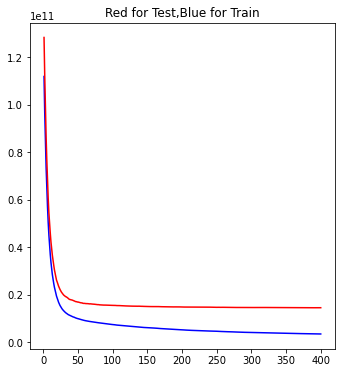

In [582]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(testsc,clf.train_score_,'blue',label= 'Set dev train')
plt.plot(testsc,t_sc,'Red',label = 'set dev test')
plt.title('Red for Test,Blue for Train')
plt.xlabel('')